In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
words = []
anger = []
anticipation = []
disgust = []
fear = []
joy = []
negative = []
positive = []
sadness = []
surprise = []
trust = []

file_loc = "gdrive/My Drive/Colab/Shakespeare Emotion Analyses/Emotion-Lexicon.csv"
file = open(file_loc, 'r') 
lines = file.readlines() 
for line in lines[1:]:
    row = line.strip().split("\t")
    words.append(row[0])
    anger.append(row[1])
    anticipation.append(row[2])
    disgust.append(row[3])
    fear.append(row[4])
    joy.append(row[5])
    negative.append(row[6])
    positive.append(row[7])
    sadness.append(row[8])
    surprise.append(row[9])
    trust.append(row[10])

In [0]:
with open("/content/gdrive/My Drive/Colab/Shakespearean Antagonisms/data/stopwords.txt") as f:
  stoplist = f.readlines()

In [0]:
stoplist = [word.strip() for word in stoplist]

In [5]:
from smart_open import open
from gensim import utils
import gensim.models
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import KeyedVectors
from sklearn.decomposition import TruncatedSVD 
import numpy as np
import requests
!pip install adjustText
from adjustText import adjust_text

In [0]:
all_text = open("https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Macbeth/all.log").read().split("\n")

In [0]:
texts = [[line for line in utils.tokenize(lines)] for lines in all_text]

In [0]:
texts = [[word for word in text if word not in stoplist] for text in texts]

In [0]:
dictionary = Dictionary(texts)

In [0]:
documents = [
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/BUCKINGHAM.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/CATESBY.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/CLARENCE.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/DERBY.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/DUCHESS%20OF%20YORK.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/First%20Murderer.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/HASTINGS.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/KING%20EDWARD%20IV.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/KING%20RICHARD%20III.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/LADY%20ANNE.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/PRINCE%20EDWARD.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/QUEEN%20ELIZABETH.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/QUEEN%20MARGARET.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/RICHMOND.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/RIVERS.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/Second%20Murderer.txt",
"https://raw.githubusercontent.com/ogrenenmakine/Shakespeare-Character-Similarity/master/data/The%20Tragedy%20of%20Richard%20the%20Third/YORK.txt",
             ]

In [0]:
document_names = [
"BUCKINGHAM",
"CATESBY",
"CLARENCE",
"DERBY",
"DUCHESS OF YORK",
"First Murderer",
"HASTINGS",
"KING EDWARD IV",
"KING RICHARD III",
"LADY ANNE",
"PRINCE EDWARD",
"QUEEN ELIZABETH",
"QUEEN MARGARET",
"RICHMOND",
"RIVERS",
"Second Murderer",
"YORK"
]

In [0]:
corpus = [dictionary.doc2bow(utils.tokenize(open(document).read().replace("\n"," "), lowercase=True)) for document in documents]

In [0]:
model_tf_idf = TfidfModel(corpus)

In [0]:
char_emotion = np.zeros((len(corpus),10))
for i in range(len(corpus)):
  character_vector = 0
  vector = model_tf_idf[corpus[i]]
  for w in vector:
    word_idx = w[0]
    weight = w[1]
    try:
      emotion_index = words.index(dictionary[word_idx])
      char_emotion[i,0] += weight*float(anger[emotion_index])
      char_emotion[i,1] += weight*float(anticipation[emotion_index])
      char_emotion[i,2] += weight*float(disgust[emotion_index])
      char_emotion[i,3] += weight*float(fear[emotion_index])
      char_emotion[i,4] += weight*float(joy[emotion_index])
      char_emotion[i,5] += weight*float(negative[emotion_index])
      char_emotion[i,6] += weight*float(positive[emotion_index])
      char_emotion[i,7] += weight*float(sadness[emotion_index])
      char_emotion[i,8] += weight*float(surprise[emotion_index])
      char_emotion[i,9] += weight*float(trust[emotion_index])
    except:
      continue

In [0]:
#char_emotion /= np.expand_dims(np.sum(char_emotion,axis=1),axis=1)

In [0]:
svd_model = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
lda_output_svd = svd_model.fit_transform(char_emotion)
# X and Y axes of the plot using SVD decomposition
x_coords = lda_output_svd[:, 1]
y_coords = lda_output_svd[:, 0]

In [17]:
lda_output_svd.shape

(17, 2)

In [18]:
svd_model.explained_variance_ratio_

array([0.65676013, 0.27339235])

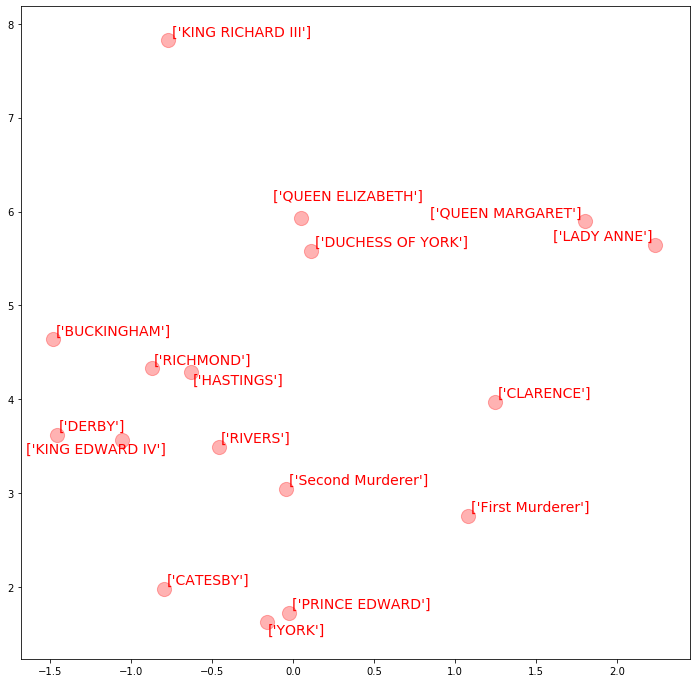

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

for i,doc in enumerate(document_names):
    x = x_coords[i]
    y = y_coords[i]
    genre = doc[0][:-1]
    plt.scatter(x, y, marker='o', color='red', alpha=0.3, s=200)
        
texts = []    
for i,doc in enumerate(document_names):
    x = x_coords[i]
    y = y_coords[i]
    doc = doc.split("-")
    texts.append(plt.text(x, y, doc, fontsize=14, color="red"))

adjust_text(texts) 
plt.show()